# Trabalho de Estatística I (SME0620)

**Docente**
- Prof. Dr. Vicente Garibay Cancho

**Alunos**
- Lucas Lima Romero 13676325
- Marco Antonio Gaspar Garcia 11833581

Dataset utilizado: https://www.kaggle.com/datasets/bhavikjikadara/student-study-performance




Adicionando as bibliotecas utilizadas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Cálculo das Medidas Resumo

In [2]:
# Abrindo o arquivo CSV e guardando os dados em um DataFrame
dados = pd.read_csv('study_performance.csv')

# As variáveis quantitativas discretas que serão utilizadas para o cálculo das medidas resumo são 'math score', 'reading score' e 'writing score'
variaveis = ['math_score', 'reading_score', 'writing_score']

# Calculando as medidas resumo
medidas_resumo = dados[variaveis].describe()

# Exibindo as medidas resumo
print(medidas_resumo)

       math_score  reading_score  writing_score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000      10.000000
25%      57.00000      59.000000      57.750000
50%      66.00000      70.000000      69.000000
75%      77.00000      79.000000      79.000000
max     100.00000     100.000000     100.000000


In [3]:
# Vamos agora printar as medidas resumo de forma mais completa

# Arredondar as medidas resumo
medidas_resumo_arredondadas = medidas_resumo.round(2)

for coluna in medidas_resumo_arredondadas.columns:

    media = medidas_resumo_arredondadas.loc['mean', coluna]
    desvio_padrao = medidas_resumo_arredondadas.loc['std', coluna]
    mediana = medidas_resumo_arredondadas.loc['50%', coluna]
    moda = dados[coluna].mode().values[0]  # Calcula a moda a partir do DataFrame original

    Q1 = dados[coluna].quantile(0.25)  # Calcula o primeiro quartil

    # O segundo quartil é a própria mediana, obtida anteriormente

    Q3 = dados[coluna].quantile(0.75)  # Calcula o terceiro quartil

    print(f"A média de {coluna} foi {media:.2f}")
    print(f"O desvio padrão de {coluna} foi {desvio_padrao:.2f}")
    print(f"A mediana de {coluna} foi {mediana:.2f}")
    print(f"A moda de {coluna} foi {moda:.2f}")
    print(f"O primeiro quartil de {coluna} foi {Q1:.2f}")
    print(f"O terceiro quartil de {coluna} foi {Q3:.2f}")
    print()

A média de math_score foi 66.09
O desvio padrão de math_score foi 15.16
A mediana de math_score foi 66.00
A moda de math_score foi 65.00
O primeiro quartil de math_score foi 57.00
O terceiro quartil de math_score foi 77.00

A média de reading_score foi 69.17
O desvio padrão de reading_score foi 14.60
A mediana de reading_score foi 70.00
A moda de reading_score foi 72.00
O primeiro quartil de reading_score foi 59.00
O terceiro quartil de reading_score foi 79.00

A média de writing_score foi 68.05
O desvio padrão de writing_score foi 15.20
A mediana de writing_score foi 69.00
A moda de writing_score foi 74.00
O primeiro quartil de writing_score foi 57.75
O terceiro quartil de writing_score foi 79.00



## Cálculo das Medidas de Dispersão

In [4]:
# Calculando a variância, desvio padrão, primeiro quartil, mediana, terceiro quartil e amplitude interquartil para cada variável
for coluna in variaveis:
    variancia = dados[coluna].var()
    desvio_padrao = dados[coluna].std()
    Q1 = dados[coluna].quantile(0.25)
    Q3 = dados[coluna].quantile(0.75)
    iqr = Q3 - Q1
    CV = (desvio_padrao / media) * 100
    amplitude = dados[coluna].max() - dados[coluna].min()

    print(f"A variância de {coluna} foi {variancia:.2f}")
    print(f"O desvio padrão de {coluna} foi {desvio_padrao:.2f}")
    print(f"A amplitude de {coluna} foi {amplitude:.2f}")
    print(f"A amplitude interquartil de {coluna} foi {iqr:.2f}")
    print(f"O coeficiente de variação de {coluna} foi {CV:.2f}%\n")

A variância de math_score foi 229.92
O desvio padrão de math_score foi 15.16
A amplitude de math_score foi 100.00
A amplitude interquartil de math_score foi 20.00
O coeficiente de variação de math_score foi 22.28%

A variância de reading_score foi 213.17
O desvio padrão de reading_score foi 14.60
A amplitude de reading_score foi 83.00
A amplitude interquartil de reading_score foi 20.00
O coeficiente de variação de reading_score foi 21.46%

A variância de writing_score foi 230.91
O desvio padrão de writing_score foi 15.20
A amplitude de writing_score foi 90.00
A amplitude interquartil de writing_score foi 21.25
O coeficiente de variação de writing_score foi 22.33%



## Tabelas de Frequência

In [5]:
# Variável qualitativa
qualitative_var = dados['parental_level_of_education'].value_counts()
qualitative_var_df = pd.DataFrame({'parental_level_of_education': qualitative_var.index, 'frequency': qualitative_var.values})

# Variável quantitativa
bins = np.arange(0, dados['math_score'].max() + 10, 10)
bins[0] = dados['math_score'].min() - 0.001  # Ajustar o limite inferior do primeiro intervalo
quantitative_var = pd.cut(dados['math_score'], bins=bins).value_counts().sort_index()
quantitative_var_df = pd.DataFrame({'math_score_range': quantitative_var.index.astype(str), 'frequency': quantitative_var.values})

print("Tabela de frequência para variável qualitativa (parental_level_of_education):\n")
print(qualitative_var_df.to_string(index=False)) # Exibir a tabela de frequência sem o índice
print("\nTabela de frequência para variável quantitativa (math_score):\n")
print(quantitative_var_df.to_string(index=False)) 

Tabela de frequência para variável qualitativa (parental_level_of_education):

parental_level_of_education  frequency
               some college        226
         associate's degree        222
                high school        196
           some high school        179
          bachelor's degree        118
            master's degree         59

Tabela de frequência para variável quantitativa (math_score):

math_score_range  frequency
         (0, 10]          1
        (10, 20]          2
        (20, 30]         12
        (30, 40]         34
        (40, 50]        100
        (50, 60]        189
        (60, 70]        270
        (70, 80]        215
        (80, 90]        126
       (90, 100]         50


## Gráfico de Barras

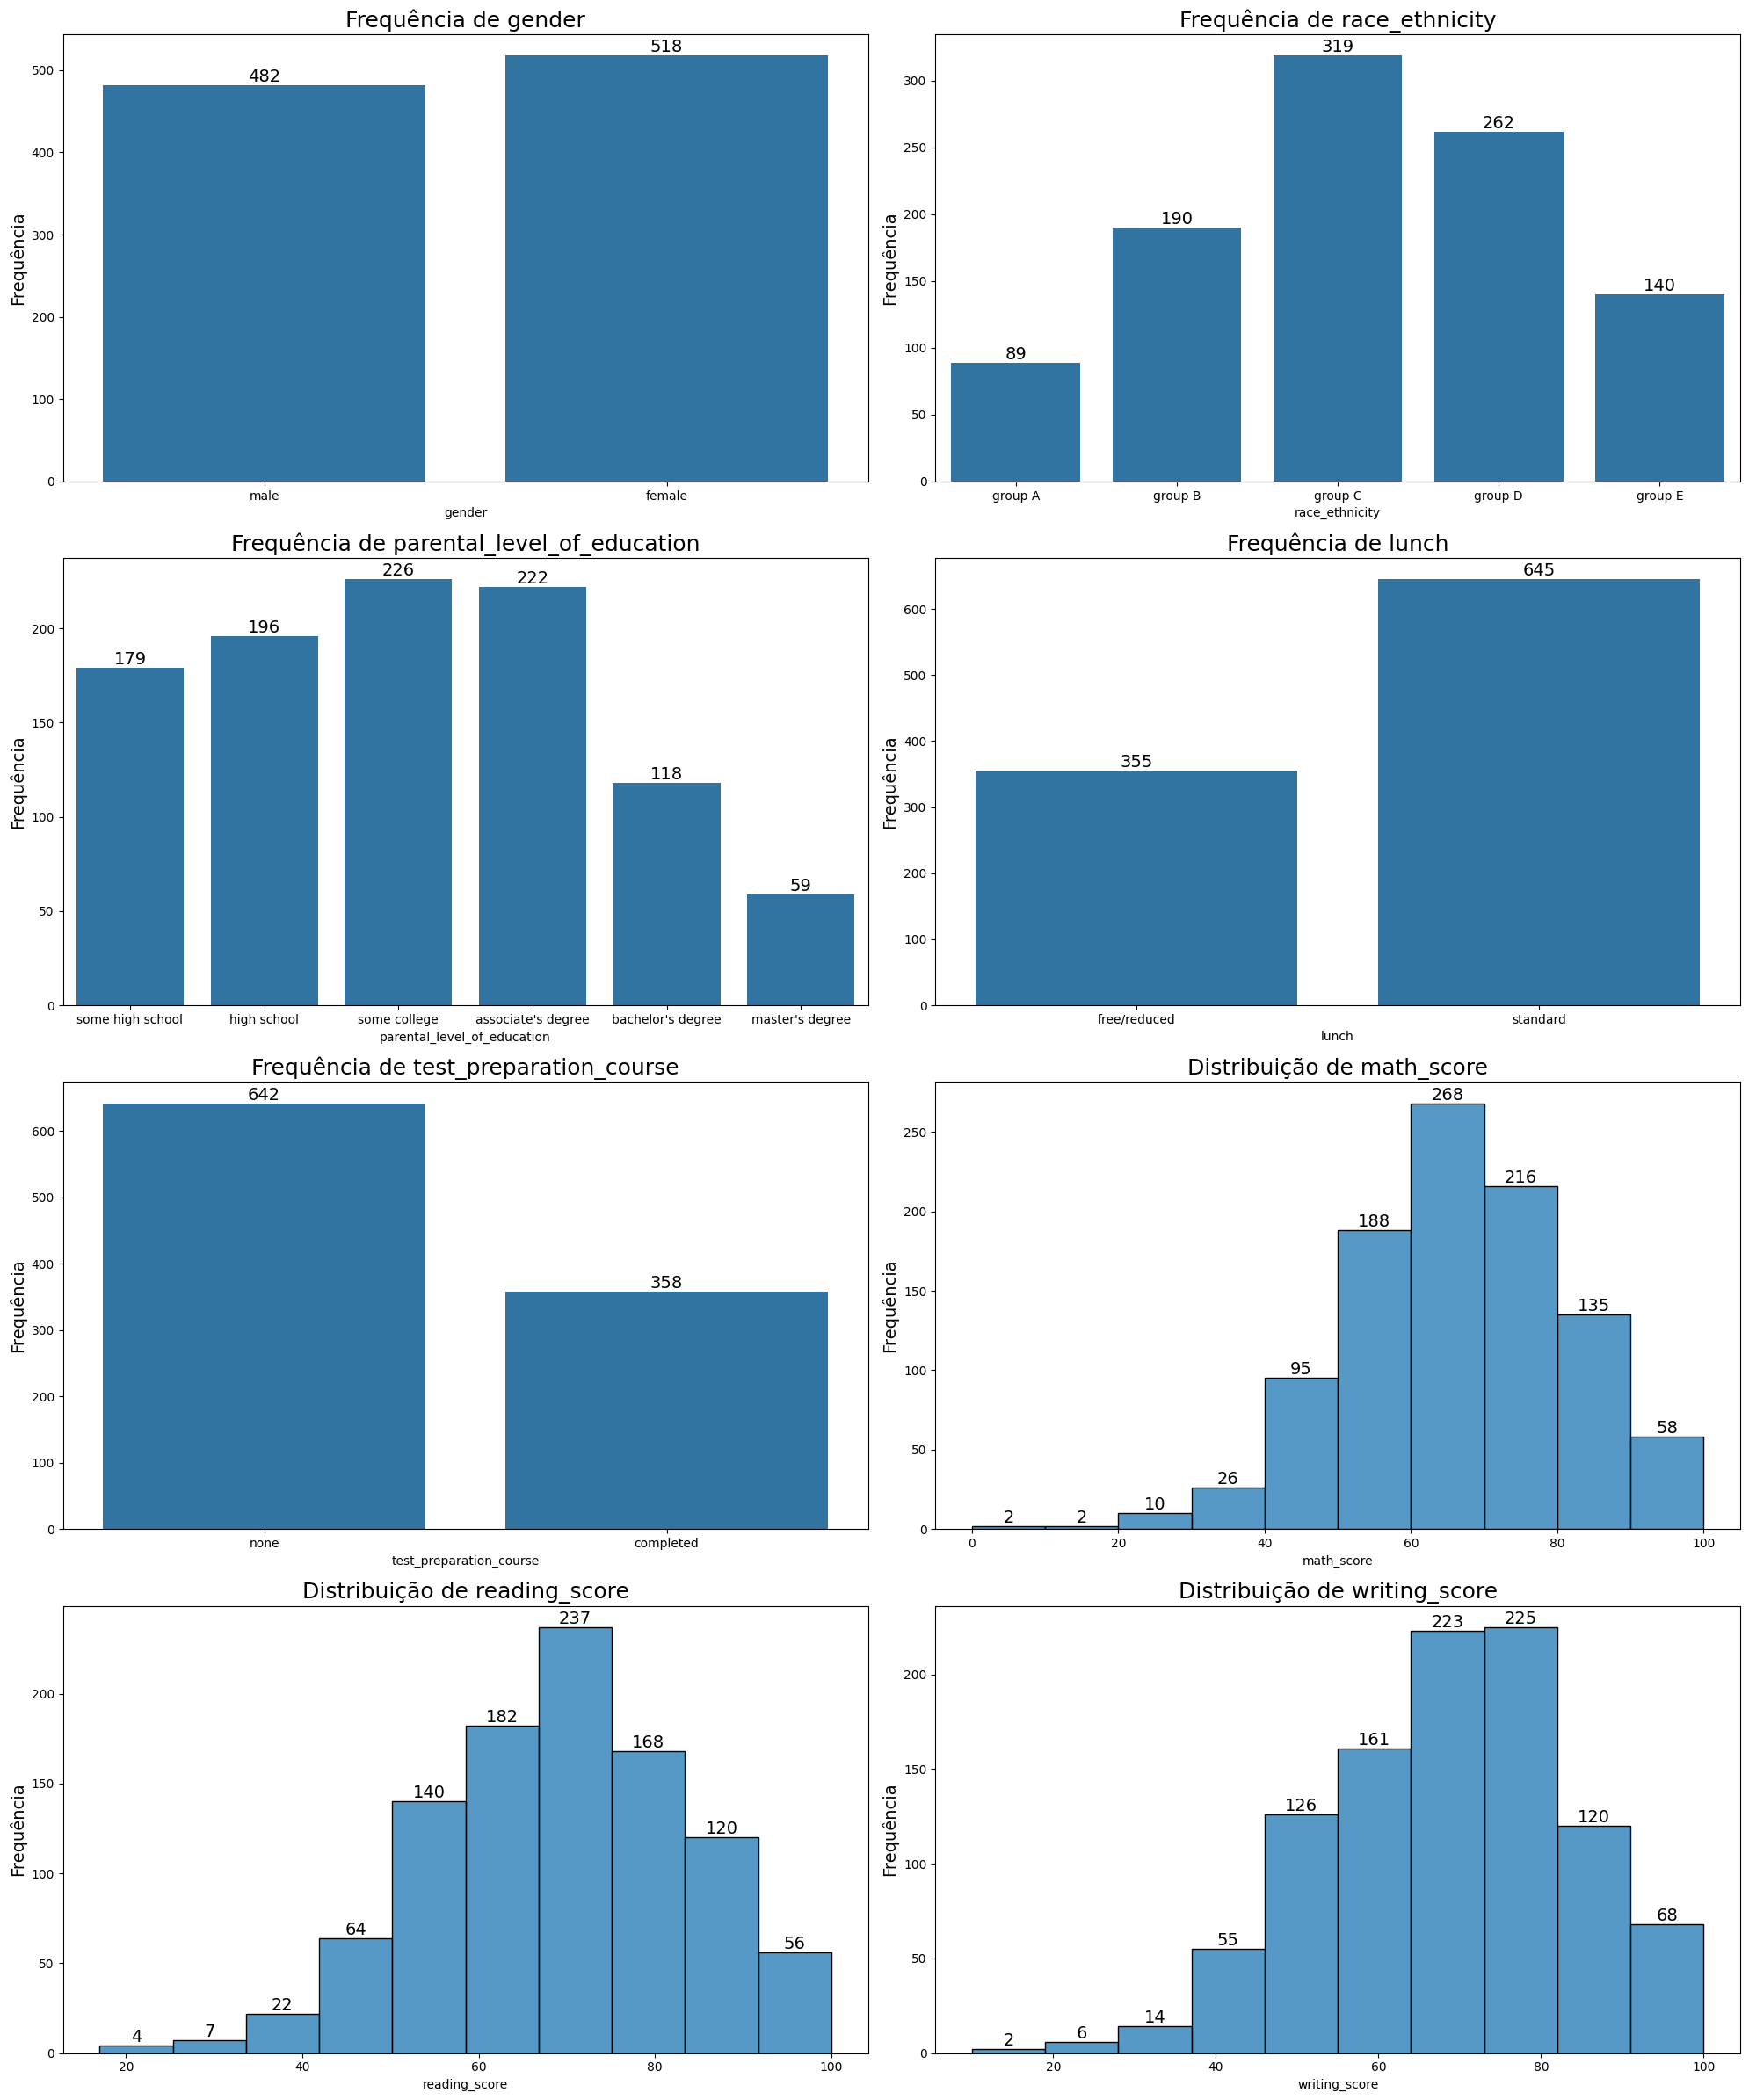

In [24]:
# Lista de colunas para os gráficos
colunas = ["gender","race_ethnicity","parental_level_of_education",
"lunch","test_preparation_course","math_score","reading_score","writing_score"]

# Número de linhas e colunas para os subplots
n_linhas = int(np.ceil(len(colunas) / 2))
n_cols = 2

# Ordem em que serão dispostos os dados no eixo x (dicionário)
ordem = {
    'gender': ['male', 'female'],
    'race_ethnicity': ['group A', 'group B', 'group C', 'group D', 'group E'],
    'parental_level_of_education': ['some high school', 'high school', 'some college', 
                                    'associate\'s degree', 'bachelor\'s degree', 
                                    'master\'s degree'],
    'lunch': ['free/reduced', 'standard'],
    'test_preparation_course': ['none', 'completed']
}

# Criar uma nova figura com subplots
fig, axes = plt.subplots(n_linhas, n_cols, figsize=(20, 6 * n_linhas))

# Criar um gráfico para cada coluna
for i, coluna in enumerate(colunas):
    # Obter o subplot atual
    ax = axes[i // n_cols, i % n_cols]
    
    # Verificar se a coluna é numérica ou categórica
    if pd.api.types.is_numeric_dtype(dados[coluna]):
        # Histograma para variáveis numéricas
        plot = sns.histplot(dados[coluna], bins=10, kde=False, ax=ax)
        plot.set_title('Distribuição de ' + coluna, fontsize=18)

    else:
        # Gráfico de barras para variáveis categóricas
        plot = sns.countplot(x=coluna, data=dados, order=ordem[coluna], ax=ax)
        plot.set_title('Frequência de ' + coluna, fontsize=18)
        
    plot.set_ylabel('Frequência', fontsize=14)
    plot.bar_label(plot.containers[0], fontsize=14)  # Adicionar rótulos de frequência

# Ajustar o layout para evitar sobreposição
plt.tight_layout()
plt.show()

## Gráfico Circular

Foi feito apenas das variáveis qualitativas, pois das quantitativas o gráfico fica muito subdividido e se torna difícil analisá-lo.

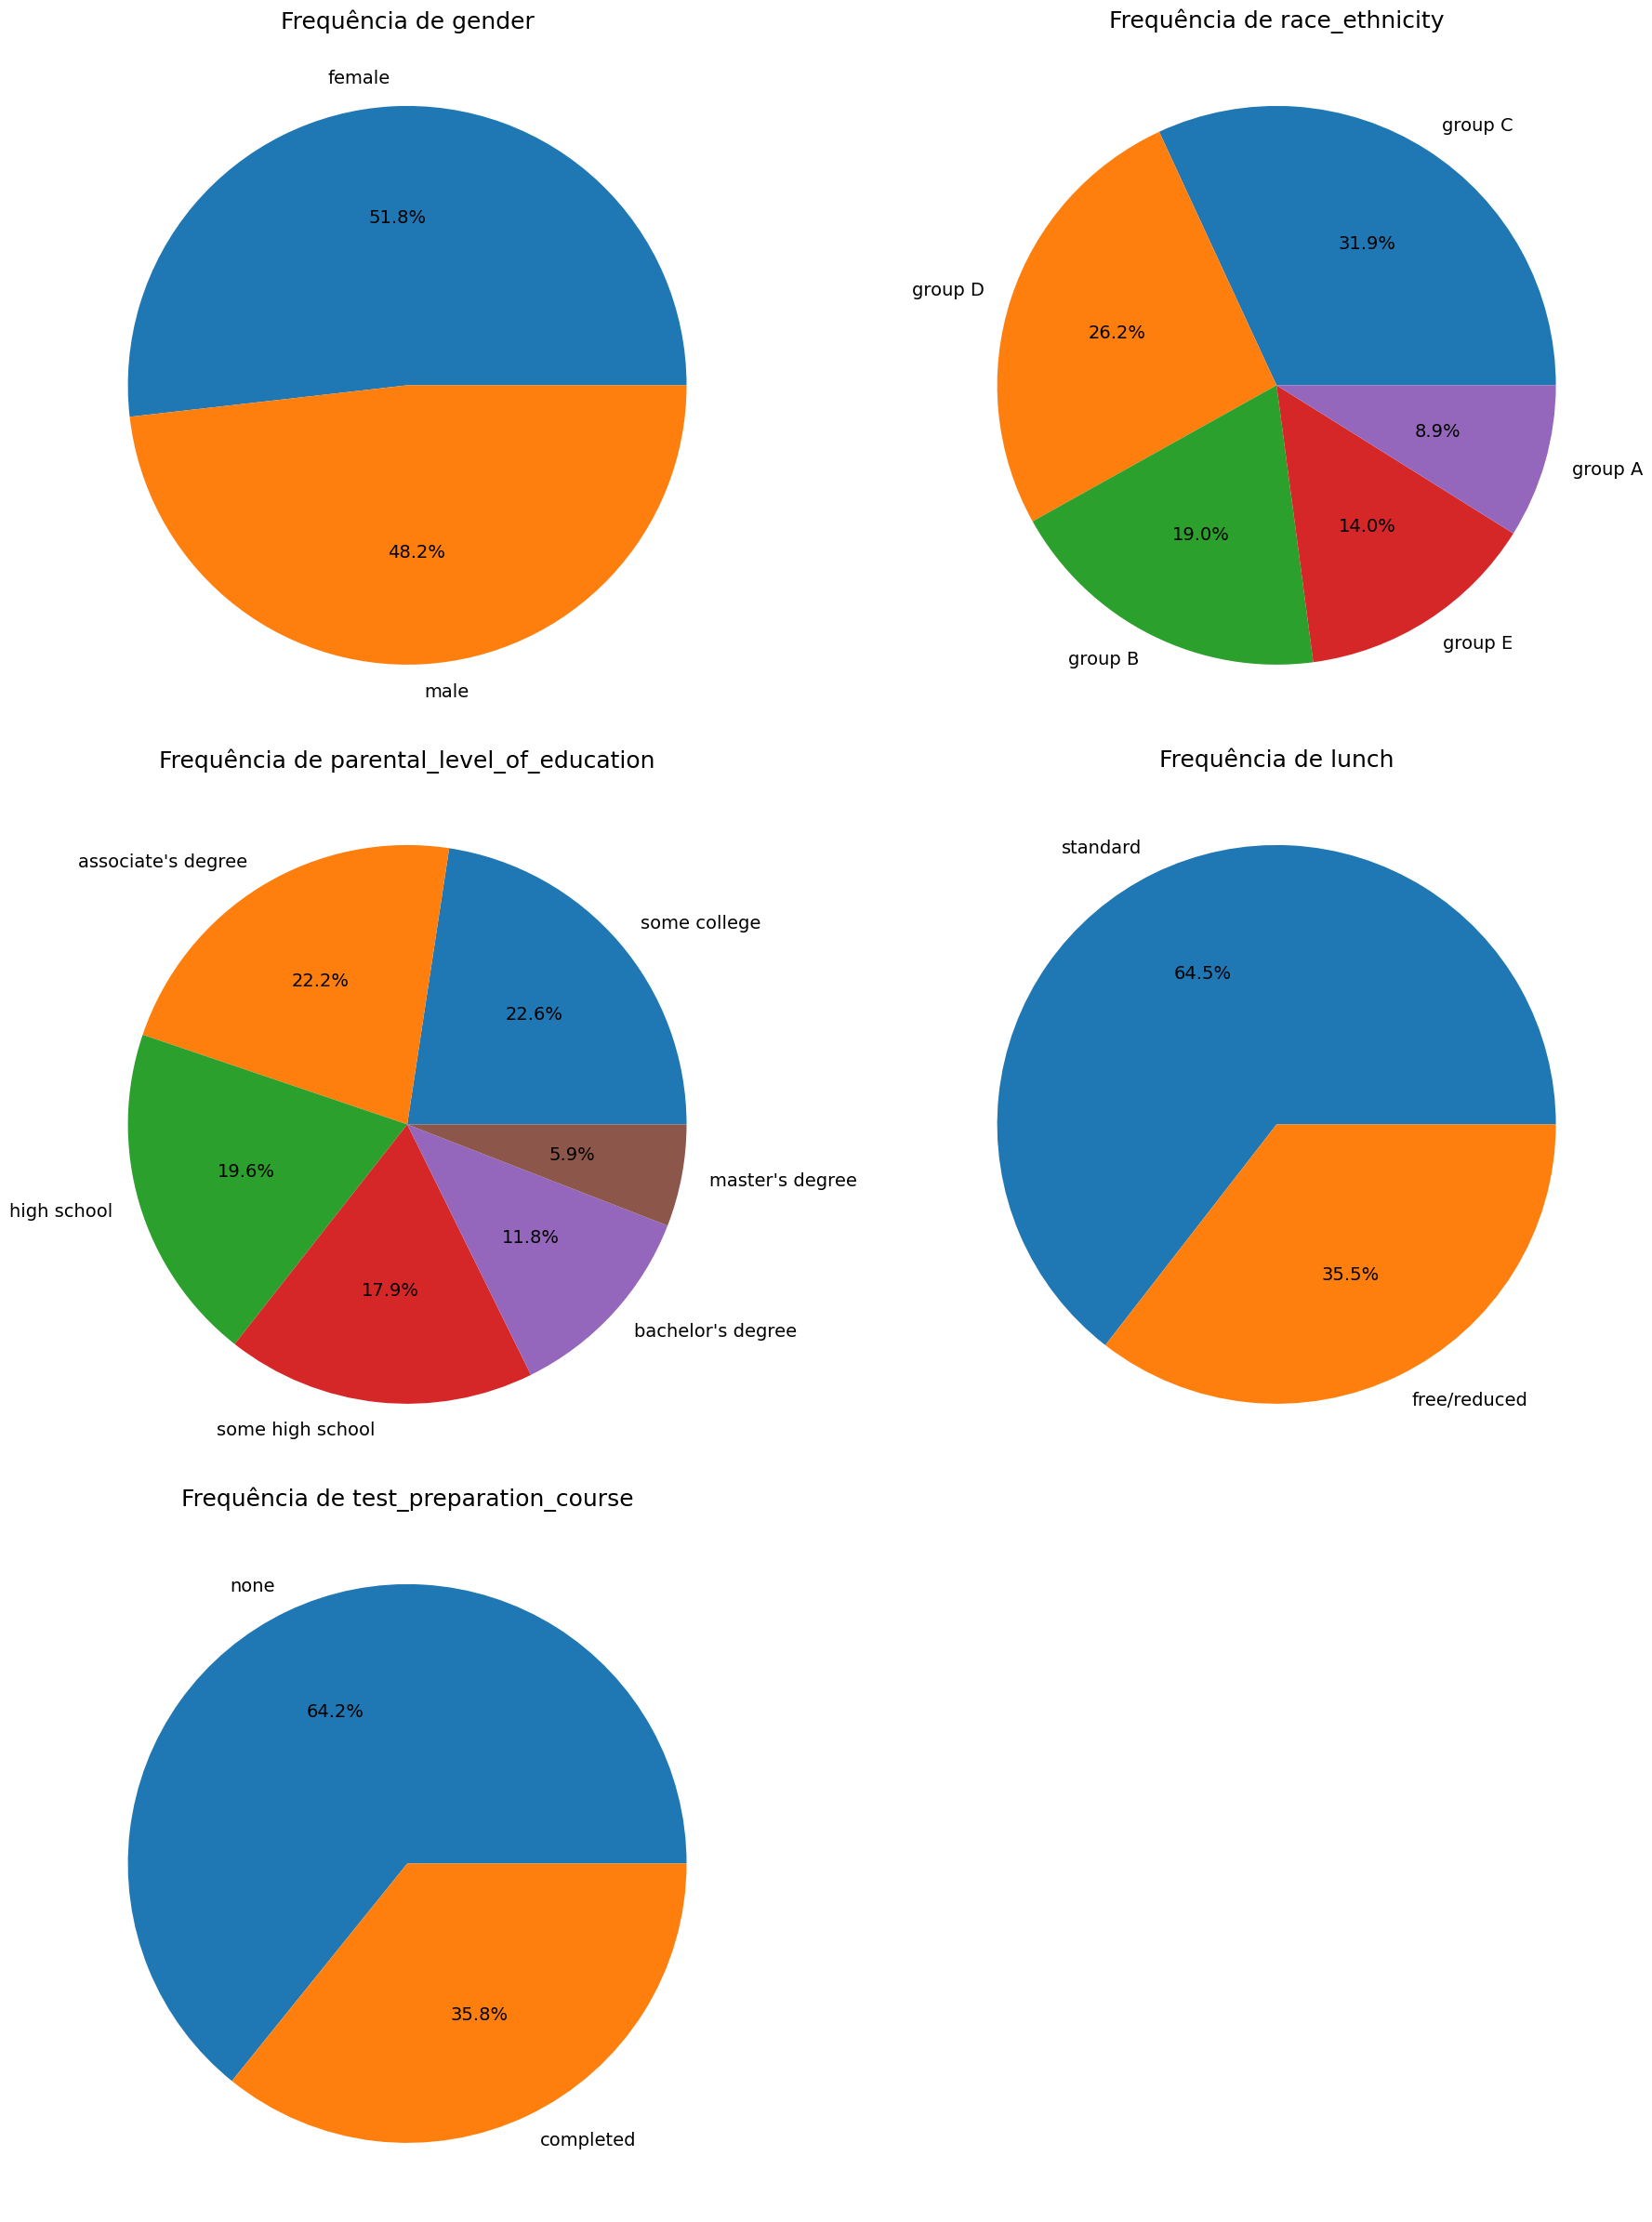

In [7]:
# Lista de colunas para os gráficos
colunas_qualitativas = ["gender","race_ethnicity","parental_level_of_education","lunch",
                        "test_preparation_course"]

# Número de linhas e colunas para os subplots
n_linhas = int(np.ceil(len(colunas_qualitativas) / 2))
n_cols = 2

# Criar uma nova figura com subplots
fig, axes = plt.subplots(n_linhas, n_cols, figsize=(20, 8 * n_linhas))

# Criar um gráfico de pizza para cada coluna
for i, coluna in enumerate(colunas_qualitativas):
    # Obter o subplot atual
    ax = axes[i // n_cols, i % n_cols]
    
    # Gráfico de pizza para variáveis categóricas
    plot = dados[coluna].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=ax, textprops={'fontsize': 14})
    plot.set_title('Frequência de ' + coluna, fontsize=18)
    plot.set_ylabel('')

# Remover o último subplot se ele estiver vazio
if len(colunas_qualitativas) % 2 != 0:
    fig.delaxes(axes[n_linhas - 1, n_cols - 1])

# Ajustar o layout para evitar sobreposição e adicionar espaço entre os subplots
plt.subplots_adjust(hspace=0.5)
plt.tight_layout()
plt.show()

## Histograma


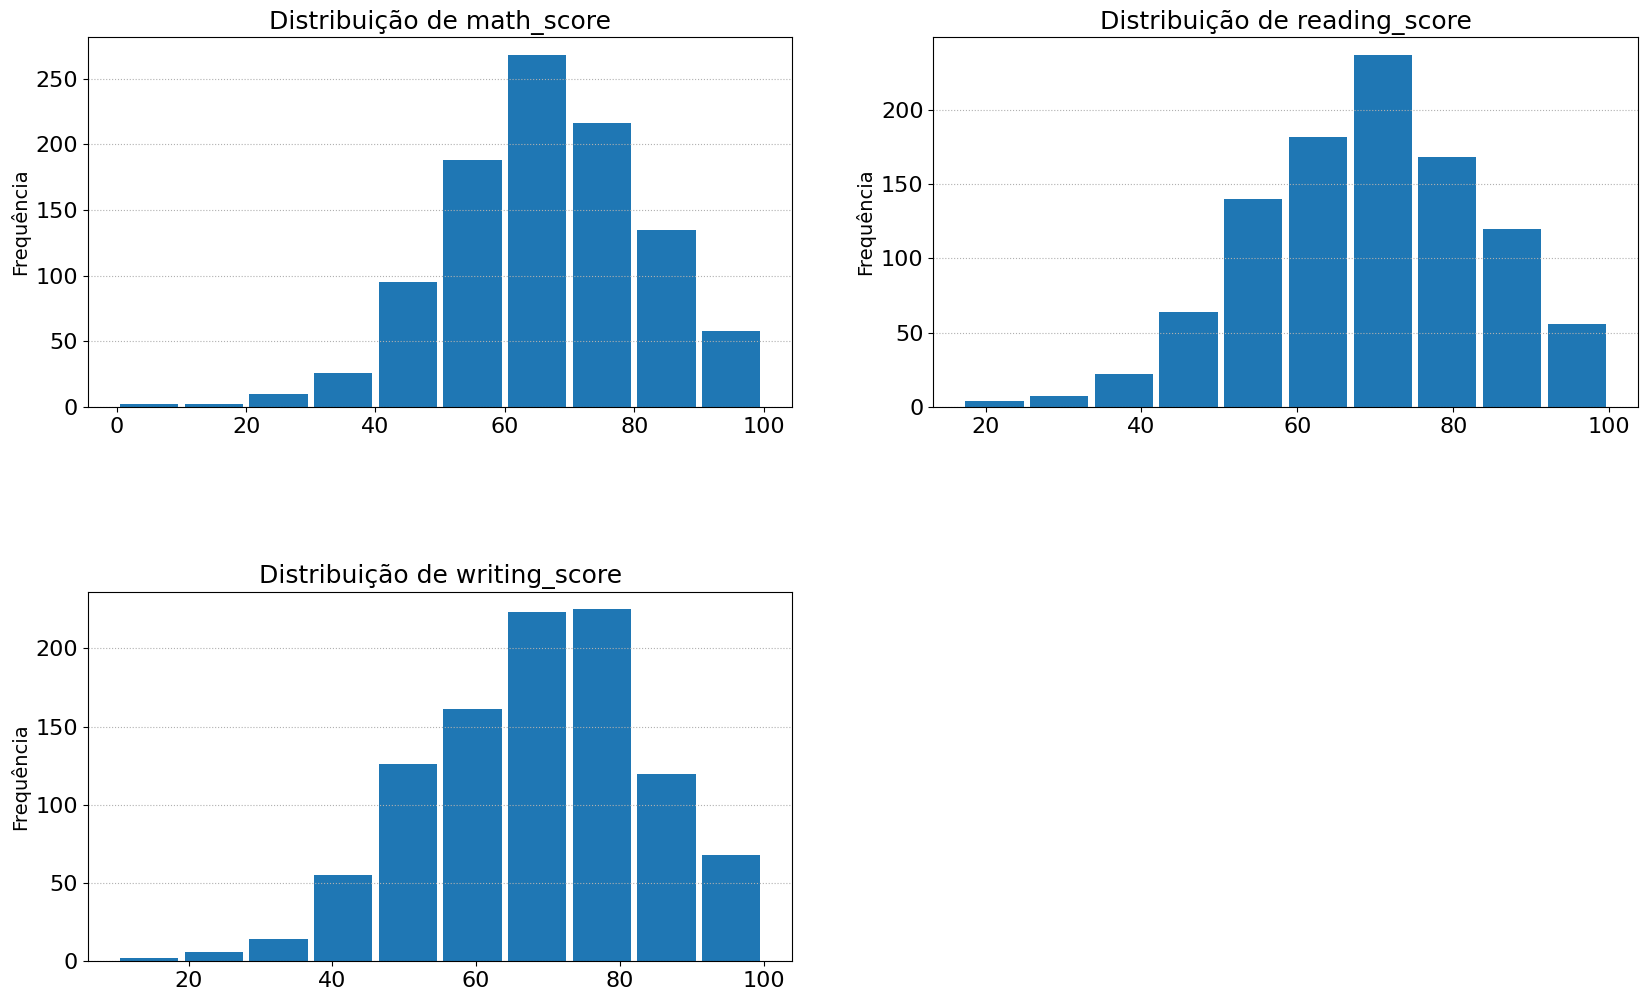

In [8]:
# Lista de colunas para os gráficos
colunas_quantitativas = ["math_score","reading_score","writing_score"]

# Número de linhas e colunas para os subplots
n_linhas = int(np.ceil(len(colunas_quantitativas) / 2))
n_cols = 2

# Criar uma nova figura com subplots
fig, axes = plt.subplots(n_linhas, n_cols, figsize=(20, 6 * n_linhas))

# Criar um histograma para cada coluna
for i, coluna in enumerate(colunas_quantitativas):
    # Obter o subplot atual
    ax = axes[i // n_cols, i % n_cols]
    
    # Histograma para variáveis numéricas
    plot = dados[coluna].plot(kind='hist', bins=10, rwidth=0.9, ax=ax, fontsize=16)
    plot.set_title('Distribuição de ' + coluna, fontsize=18)
    plot.set_ylabel('Frequência', fontsize=14)
    plot.grid(linestyle=':', axis='y')

# Remover o último subplot se ele estiver vazio
if len(colunas_quantitativas) % 2 != 0:
    fig.delaxes(axes[n_linhas - 1, n_cols - 1])

# Ajustar o layout para evitar sobreposição e adicionar espaço entre os subplots
plt.subplots_adjust(hspace=0.5)
#plt.tight_layout()
plt.show()

## Boxplot

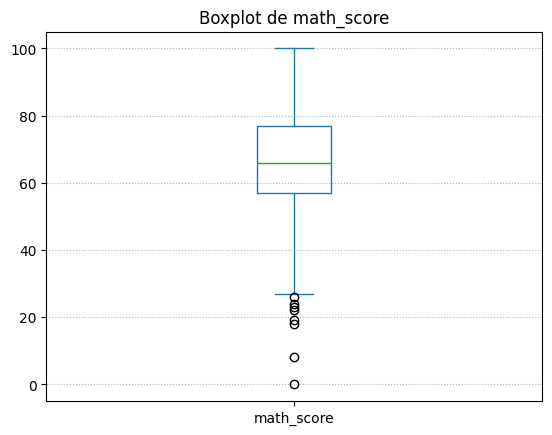

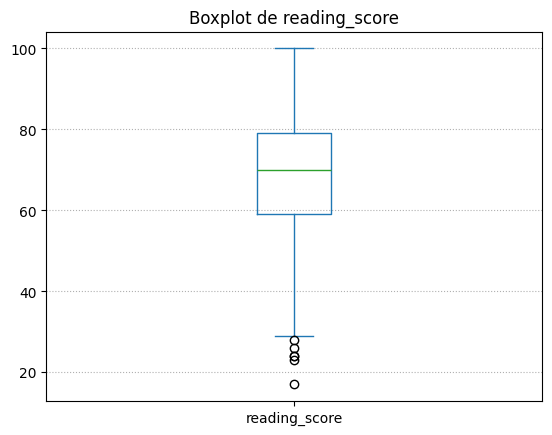

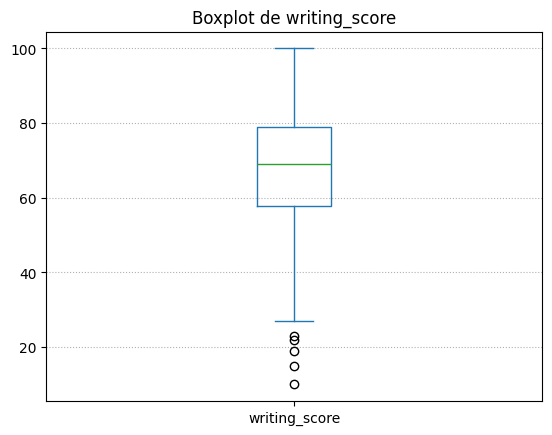

In [9]:
# Lista de colunas para os gráficos
colunas_quantitativas = ["math_score","reading_score","writing_score"]

# Criar um boxplot para cada coluna
for coluna in colunas_quantitativas:
    dados[coluna].plot(kind='box', title='Boxplot de ' + coluna)
    plt.grid(linestyle=':', axis='y')
    plt.show()

Nos Boxplots acima, retângulo mostra o Intervalo Inter-Quartil (IQR), e o segmento de reta verde indica a mediana. As linhas azuis que se estendem para fora da caixa representam a variação dos dados fora do núcleo central (fora do IQR). As circunferências pretas representam os dados que são classificados como `Outliers`.

Outliers são os dados dentro do conjunto que se diferenciam significativamente da maioria dos outros dados. Eles podem ser muito maiores ou menores, representando uma variação anormal do conjunto de dados. 

Percebe-se através dos plots que, considerando o tamanho do Dataset (1.000 entradas), há poucos outliers no Conjunto, indicando que existem poucos casos extremos em que o aluno teve um desempenho muito abaixo da média. Além disso, Matemática foi a disciplina com mais outliers. Isso significa que mais alunos tiveram um desempenho muito ruim em matemática, em relação às outras disciplinas analisadas.

## Diagrama de Dispersão

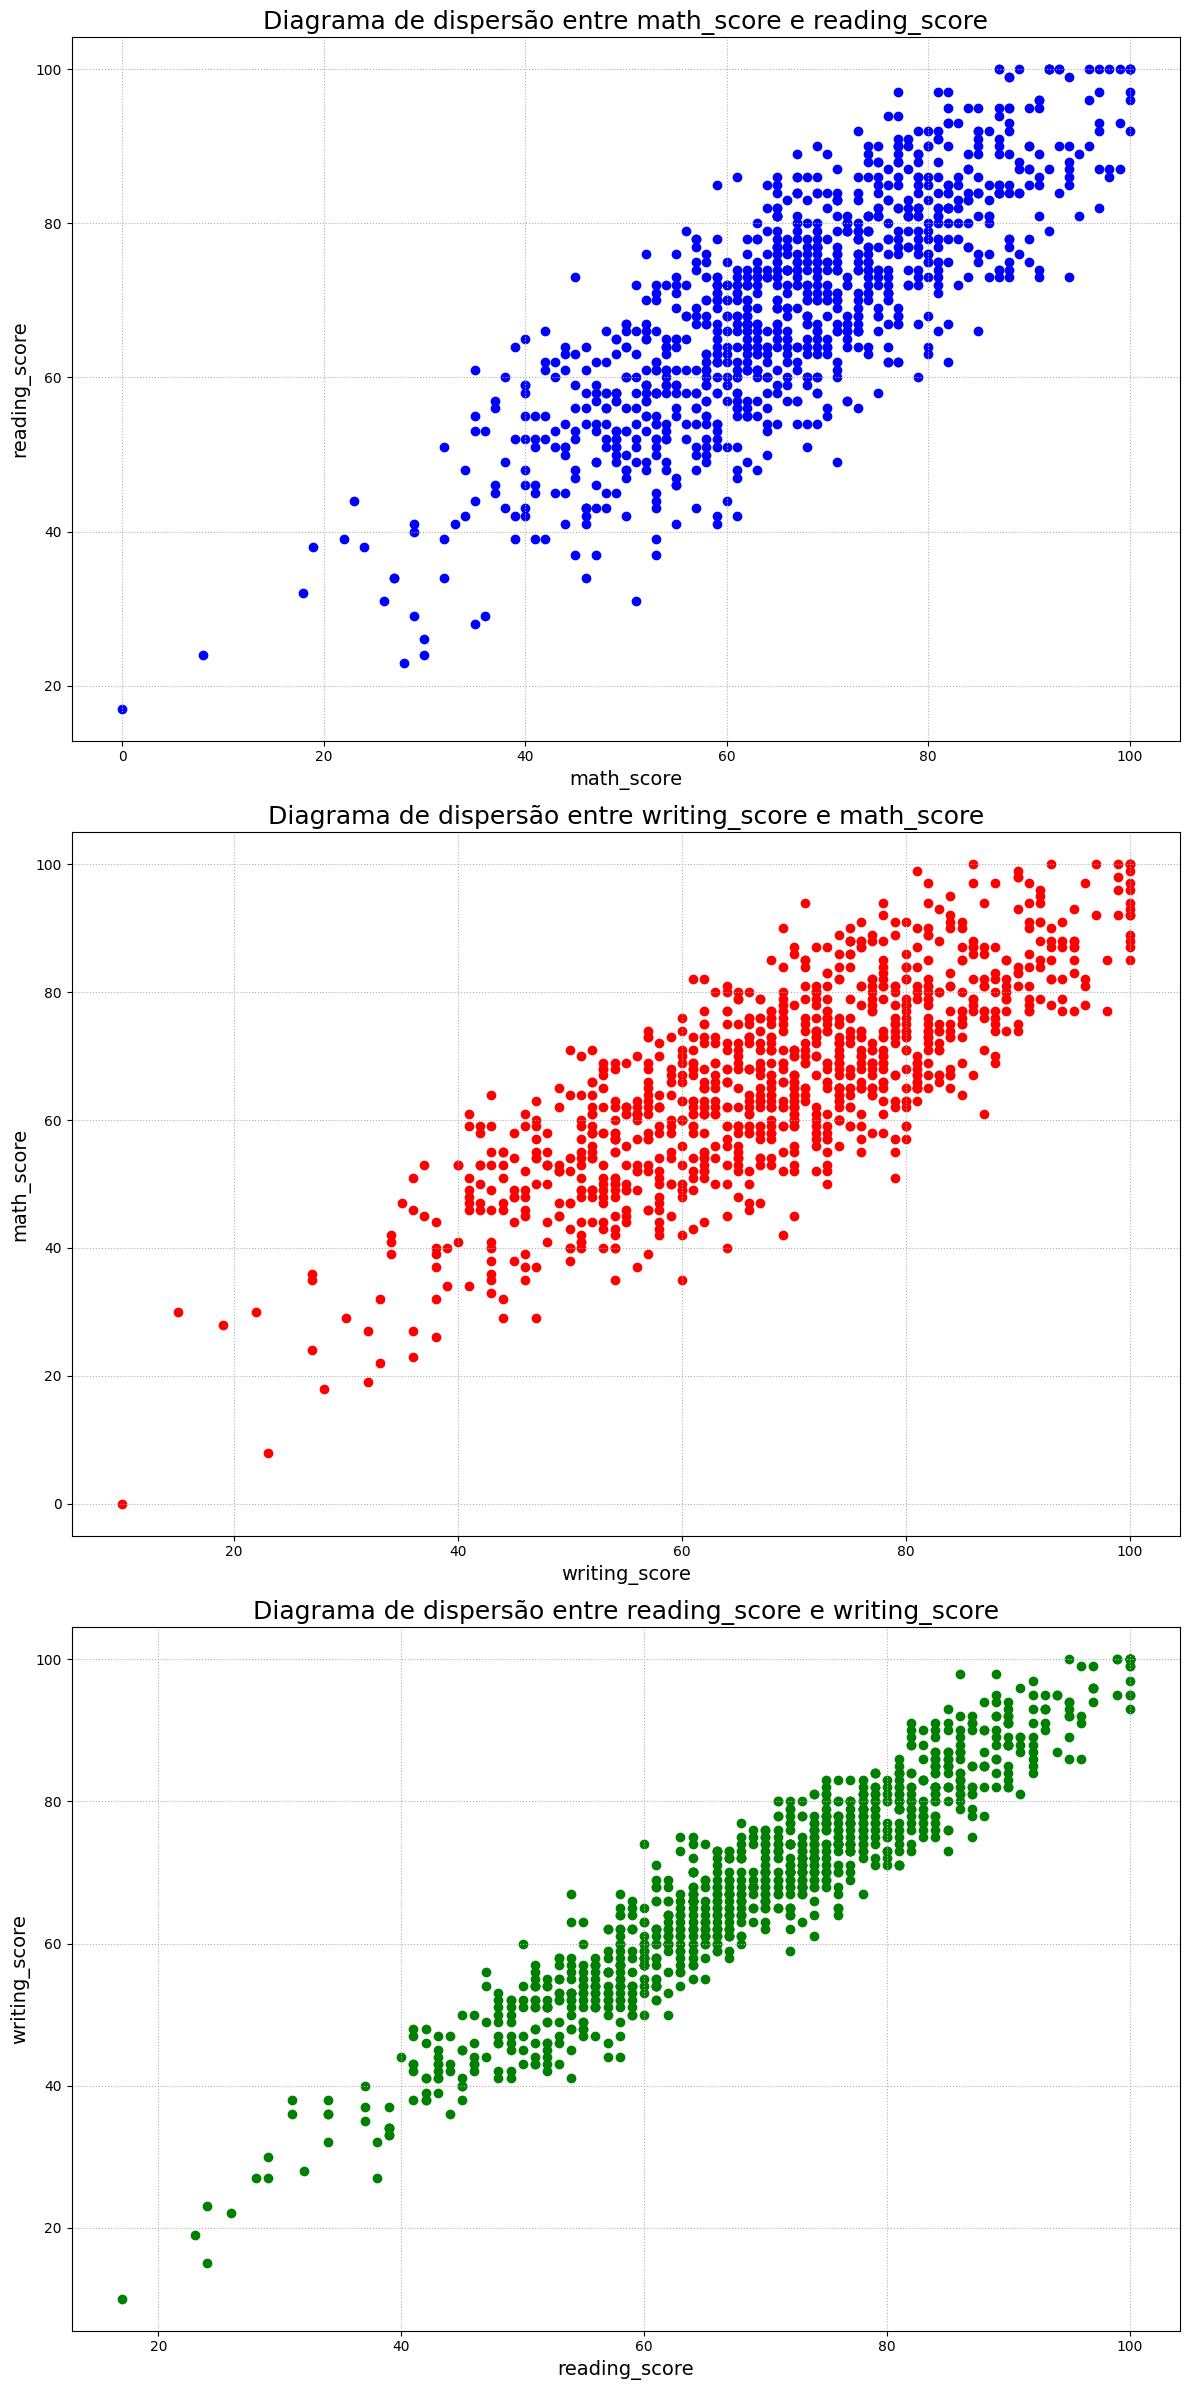

In [10]:
# Criar um diagrama de dispersão para as disciplinas
fig, axes = plt.subplots(3, 1, figsize=(12,24))

# Primeiro plot: Diagrama de dispersão "math_score" e "reading_score"
axes[0].scatter(dados['math_score'], dados['reading_score'], color='blue')
axes[0].set_title('Diagrama de dispersão entre math_score e reading_score', fontsize=18)
axes[0].set_xlabel('math_score', fontsize=14)
axes[0].set_ylabel('reading_score', fontsize=14)
axes[0].grid(linestyle=':')

# Terceiro plot: Diagrama de dispersão entre "writing_score" e "math_score"
axes[1].scatter(dados['writing_score'], dados['math_score'], color='red')
axes[1].set_title('Diagrama de dispersão entre writing_score e math_score', fontsize=18)
axes[1].set_xlabel('writing_score', fontsize=14)
axes[1].set_ylabel('math_score', fontsize=14)
axes[1].grid(linestyle=':')

# Terceiro plot: Diagrama de dispersão entre "reading_score" e "writing_score"
axes[2].scatter(dados['reading_score'], dados['writing_score'], color='green')
axes[2].set_title('Diagrama de dispersão entre reading_score e writing_score', fontsize=18)
axes[2].set_xlabel('reading_score', fontsize=14)
axes[2].set_ylabel('writing_score', fontsize=14)
axes[2].grid(linestyle=':')

plt.tight_layout()
plt.show()

O conjunto de pontos em todos os gráficos de dispersão estão ascendentes, isso indica uma correlação positiva entre as duas variáveis.

No caso do primeiro plot, essa correlação positiva entre "math_score" e "reading_score" significa que, em geral, os estudantes que obtêm pontuações mais altas em matemática também tendem a obter pontuações mais altas em leitura. Observa-se a mesma coisa para os outros dois plots, indicando que os estudantes que têm um bom desempenho em uma disciplina tendem a ter um bom desempenho nas outras.

Isso não significa necessariamente que ser bom em matemática faz alguém ser bom em leitura, ou vice-versa. No entanto, a correlação positiva sugere que há uma relação entre as duas pontuações.

## Medidas Resumo e Representação Gráfica 

- Vamos considerar "math_score" como a variável quantitativa em relação às outras variáveis qualitativas

Resumo:
         count       mean        std   min   25%   50%   75%    max
gender                                                            
female  518.0  63.633205  15.491453   0.0  54.0  65.0  74.0  100.0
male    482.0  68.728216  14.356277  27.0  59.0  69.0  79.0  100.0

Moda:
 gender
female    65
male      62
Name: math_score, dtype: int64

IQR:
 gender
female    20.0
male      20.0
Name: math_score, dtype: float64


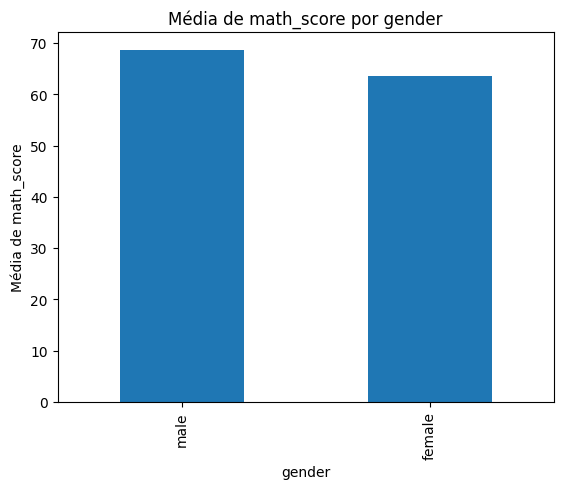

---------------------------------------------------------------------
Resumo:
                 count       mean        std   min    25%   50%   75%    max
race_ethnicity                                                             
group A          89.0  61.629213  14.523008  28.0  51.00  61.0  71.0  100.0
group B         190.0  63.452632  15.468191   8.0  54.00  63.0  74.0   97.0
group C         319.0  64.463950  14.852666   0.0  55.00  65.0  74.0   98.0
group D         262.0  67.362595  13.769386  26.0  59.00  69.0  77.0  100.0
group E         140.0  73.821429  15.534259  30.0  64.75  74.5  85.0  100.0

Moda:
 race_ethnicity
group A    53
group B    58
group C    65
group D    69
group E    68
Name: math_score, dtype: int64

IQR:
 race_ethnicity
group A    20.00
group B    20.00
group C    19.00
group D    18.00
group E    20.25
Name: math_score, dtype: float64


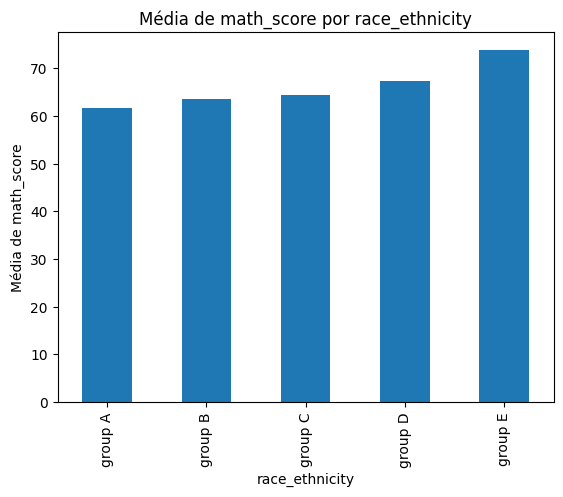

---------------------------------------------------------------------
Resumo:
                              count       mean        std   min    25%   50%  \
parental_level_of_education                                                   
associate's degree           222.0  67.882883  15.112093  26.0  57.00  67.0   
bachelor's degree            118.0  69.389831  14.943789  29.0  61.00  68.0   
high school                  196.0  62.137755  14.539651   8.0  53.75  63.0   
master's degree               59.0  69.745763  15.153915  40.0  55.50  73.0   
some college                 226.0  67.128319  14.312897  19.0  59.00  67.5   
some high school             179.0  63.497207  15.927989   0.0  53.00  65.0   

                              75%    max  
parental_level_of_education               
associate's degree           80.0  100.0  
bachelor's degree            79.0  100.0  
high school                  72.0   99.0  
master's degree              81.0   95.0  
some college                 7

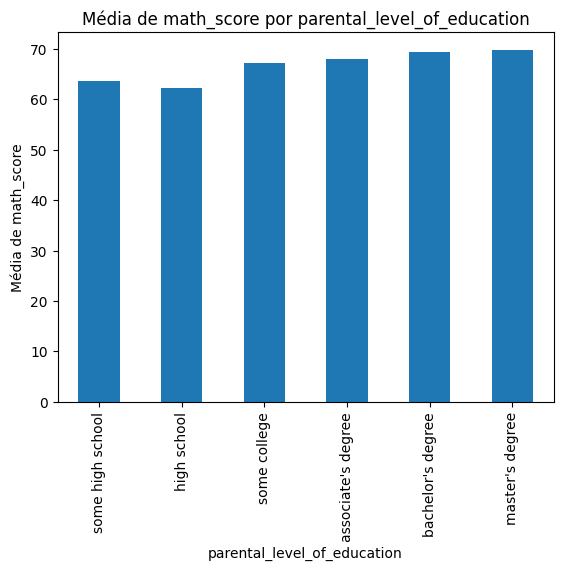

---------------------------------------------------------------------
Resumo:
               count       mean        std   min   25%   50%   75%    max
lunch                                                                   
free/reduced  355.0  58.921127  15.159956   0.0  49.0  60.0  69.0  100.0
standard      645.0  70.034109  13.653501  19.0  61.0  69.0  80.0  100.0

Moda:
 lunch
free/reduced    61
standard        69
Name: math_score, dtype: int64

IQR:
 lunch
free/reduced    20.0
standard        19.0
Name: math_score, dtype: float64


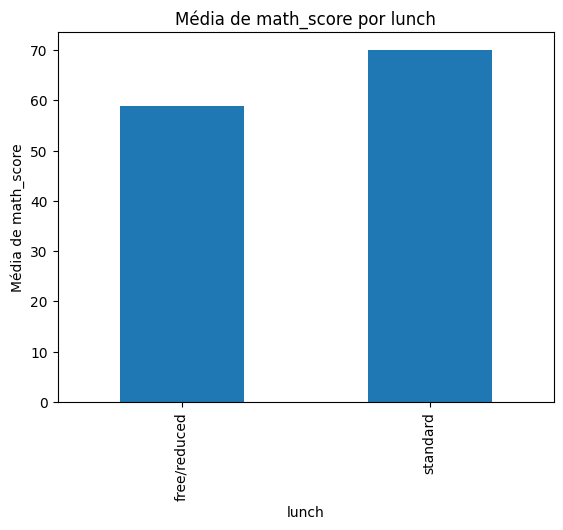

---------------------------------------------------------------------
Resumo:
                          count       mean        std   min   25%   50%    75%  \
test_preparation_course                                                         
completed                358.0  69.695531  14.444699  23.0  60.0  69.0  79.00   
none                     642.0  64.077882  15.192376   0.0  54.0  64.0  74.75   

                           max  
test_preparation_course         
completed                100.0  
none                     100.0  

Moda:
 test_preparation_course
completed    65
none         62
Name: math_score, dtype: int64

IQR:
 test_preparation_course
completed    19.00
none         20.75
Name: math_score, dtype: float64


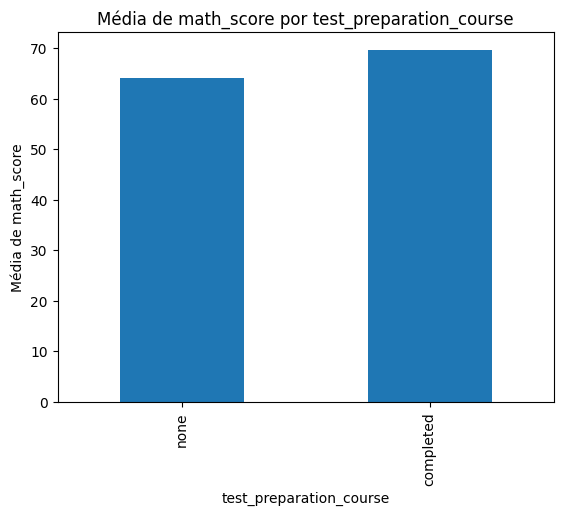

---------------------------------------------------------------------


In [15]:
# Variáveis qualitativas de escolha
variaveis = ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']

# Escolhemos a disciplina de matemática para realizar a comparação
subject = 'math_score'

for var in variaveis:
    # Calcular as medidas resumo para "math_score" agrupadas por variável qualitativa
    resumo = dados.groupby(var)[subject].describe()
    print("Resumo:\n", resumo)

    # Calcular a moda para "math_score" agrupadas por variável qualitativa
    moda = dados.groupby(var)[subject].agg(lambda x: pd.Series.mode(x)[0])
    print("\nModa:\n", moda)

    # Calcular o IQR para "math_score" agrupadas por variável qualitativa
    iqr = dados.groupby(var)[subject].apply(lambda x: x.quantile(0.75) - x.quantile(0.25))
    print("\nIQR:\n", iqr)

    # Criar um gráfico de barras para as médias de "math_score" agrupadas por variável qualitativa
    mean_scores = dados.groupby(var)[subject].mean().reindex(ordem[var])
    mean_scores.plot(kind='bar', title=f'Média de math_score por {var}')
    plt.ylabel('Média de math_score')
    plt.show()
    print("---------------------------------------------------------------------")

Analisando a média de math_score em relação as variáveis qualitativas, é possível notar uma tendência:

- O **gênero** masculino foi melhor em média que o gênero feminino em matemática. Entretanto, como visto anteriormente, o gênero feminino foi melhor nas outras duas disciplinas (leitura e redação), sendo impossível concluir alguma superioridade geral baseada apenas nesses resultados. Isso destaca a importância de considerar múltiplas dimensões de desempenho acadêmico ao avaliar as diferenças entre gêneros.

- Os **grupos étnicos**, de A a E, apresentaram um desempenho médio crescente, sendo A o pior e E o melhor. O Dataset não especifica quais são os grupos étnicos, sendo impossível realizar uma análise mais profunda. Entretanto, é notável que existe uma grande diferença entre os grupos étnicos, muito provavelmente provocada pelas diferenças socioeconômicas que acometem a maioria dos indivíduos.
- Quanto maior o **grau de escolaridade dos pais**, maior foi o desempenho médio dos alunos em matemática. 

- Os alunos que recebem um **almoço** grátis ou reduzido foram piores, na média, do que os alunos que recebem um almoço padrão. Isso indica que a condição socioeconômica dos alunos é um fator crucial no seu desempenho escolar.

- Os alunos que realizaram um **curso de preparação** para o teste foram em média melhores que os alunos que não realizaram nenhum curso. 